In [1]:
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import scipy as sp
from sklearn import datasets, linear_model as linm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from scipy.io import loadmat

1. Baza danych Iris - proszę podzielić na zbiór uczący i testowy
2. Wybieramy wartość k
3. Poszukujemy k obserwacji, które są najbliższe do naszego analizowanego przykładu. Do wyznaczania odległości skorzystaj z algorytmu Eukleidesa.
4. Użyj najczęściej pojawiającej się wartości z “k najbliższych sąsiadów” jako wartość dla nieznanego Iris.

In [2]:
db_iris = datasets.load_iris()
 
#Podziel zbiór na uczący i testowy, test_size - procentowy udział (przykład 50 % uczący i testowy)
features_train, features_test, labels_train, labels_test = train_test_split(db_iris.data, db_iris.target, test_size=0.5)


k=4

In [3]:
db_iris.data # sepal characteristics

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
db_iris.target # 3 types (categories) - 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
print(features_train) #


[[5.7 3.  4.2 1.2]
 [5.7 2.6 3.5 1. ]
 [5.8 2.7 5.1 1.9]
 [5.5 3.5 1.3 0.2]
 [7.1 3.  5.9 2.1]
 [5.6 2.9 3.6 1.3]
 [5.5 2.4 3.7 1. ]
 [7.  3.2 4.7 1.4]
 [6.7 2.5 5.8 1.8]
 [6.9 3.1 4.9 1.5]
 [4.3 3.  1.1 0.1]
 [5.6 2.7 4.2 1.3]
 [4.6 3.4 1.4 0.3]
 [4.9 3.1 1.5 0.2]
 [5.6 2.5 3.9 1.1]
 [6.  2.2 5.  1.5]
 [5.6 3.  4.5 1.5]
 [5.  3.4 1.5 0.2]
 [6.4 3.2 5.3 2.3]
 [5.1 2.5 3.  1.1]
 [4.8 3.  1.4 0.1]
 [7.2 3.6 6.1 2.5]
 [6.3 2.3 4.4 1.3]
 [6.7 3.3 5.7 2.1]
 [5.8 4.  1.2 0.2]
 [6.  3.  4.8 1.8]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.3 0.3]
 [6.1 3.  4.9 1.8]
 [6.  3.4 4.5 1.6]
 [5.1 3.5 1.4 0.3]
 [5.7 4.4 1.5 0.4]
 [5.  3.6 1.4 0.2]
 [5.5 4.2 1.4 0.2]
 [5.8 2.7 3.9 1.2]
 [4.7 3.2 1.3 0.2]
 [4.8 3.  1.4 0.3]
 [6.4 2.8 5.6 2.1]
 [6.8 3.  5.5 2.1]
 [4.6 3.6 1.  0.2]
 [5.2 4.1 1.5 0.1]
 [7.3 2.9 6.3 1.8]
 [6.  2.7 5.1 1.6]
 [5.4 3.4 1.7 0.2]
 [5.7 2.9 4.2 1.3]
 [6.4 3.2 4.5 1.5]
 [6.6 2.9 4.6 1.3]
 [6.5 3.  5.8 2.2]
 [5.4 3.9 1.7 0.4]
 [5.7 2.8 4.1 1.3]
 [5.8 2.8 5.1 2.4]
 [5.2 3.4 1.4 0.2]
 [5.1 3.3 1.

In [6]:
print(db_iris.data.shape[0])

150


#### The above methods splits the data to 2 groups - accordingly to the percentage.


In [7]:
print(features_train.shape[0])

75


In [8]:
def KNN(info, features_, k_, labels_):
    """
    info - the data based on which the classification is performed
    features_ - indexies 
    k_ - 
    labels_ - 
    """
    lengths = np.zeros((features_.shape[0], 2)) #Empty dataset
    lengths = np.c_[lengths,labels_.T] #
    for j in range(0,features_.shape[0]):
        lengths[j,0]=abs(distance.euclidean(info,features_[j])); # scipy.spatial import distance
        lengths[j,1]=j;
    temp=np.argpartition(lengths[:,0], k_) # I still don't quite understand how this method works.
    nearest_neighbours=temp[0:k_]
    nearest_neighbour_labels=lengths[nearest_neighbours]
    #print(lengths)
    #print(nearest_neighbour_labels)
    x_mode, count = sp.stats.mode(nearest_neighbour_labels[:,2])
    return x_mode[0]

predictions=np.zeros((labels_train.shape[0]),dtype=int)

for i in range(0,labels_train.shape[0]):
    predictions[i]=KNN(features_test[i], features_train, k, labels_train)

print("Prediction made: ")
print(predictions,"\n",labels_test)
output = accuracy_score(labels_test, predictions) #from sklearn.metrics import accuracy_score
print(output)

Prediction made: 
[2 1 1 0 0 0 0 2 1 2 0 1 0 2 1 1 1 0 1 1 0 2 2 2 1 1 1 2 2 1 2 1 2 0 0 2 0
 0 0 2 0 2 0 0 1 1 2 1 2 1 1 1 2 0 2 2 0 1 0 0 2 1 1 1 1 1 0 1 0 1 2 2 2 2
 1] 
 [2 1 1 0 0 0 0 2 1 2 0 1 0 2 1 1 2 0 1 1 0 2 2 2 1 1 1 2 2 1 2 1 2 0 0 2 0
 0 0 2 0 2 0 0 1 1 2 1 1 2 2 2 2 0 2 2 0 1 0 0 2 2 1 1 2 1 0 1 0 1 2 2 2 2
 1]
0.9066666666666666


#### Exercise 2 - kNN method using 'sklearn' library

In [9]:
db_iris = datasets.load_iris()
 
#Dividing dataset on 2 groups - learning and testing dataset (50% on 50%)
features_train, features_test, labels_train, labels_test = train_test_split(db_iris.data, db_iris.target, test_size=0.3)

k=4 # Number of nearest neighbors. 

In [10]:
knn = KNeighborsClassifier(n_neighbors=3);
knn.fit(features_train,labels_train); # Inserting features and labels dataset to automatically perform the method.

In [11]:
predictions=np.zeros((labels_train.shape[0]),dtype=int)
predictions=knn.predict(features_test)
output = accuracy_score(labels_test, predictions)
print("Accuracy match: ")
print(output)

0.9777777777777777


#### Decision tree based classifier:

In [13]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target) # The recognition is based on a whole imported sample.

DecisionTreeClassifier()

#### Predicting assigment to a class (class is a type of petal, [0;2])

In [14]:
print(clf.predict(iris.data[:1, :]))

[0]


####  Estimating probability of valid class assignment 

In [15]:
clf.predict_proba(iris.data[:1, :])

array([[1., 0., 0.]])

In [16]:
from six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 

graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
#graph[0].write_pdf("iris.pdf")
# ^^^^ not working in my case. The cause is unknown.

### Zadanie 4
#### Handwriting numbers database (mnist.mat) assignment to a given shape or size.

In [18]:
# wczytywanie danych
dane = loadmat('mnist.mat') # home.agh.edu.pl/~mdig/dokuwiki/lib/exe/fetch.php?media=teaching:data_science:datasets:mnist.mat

In [19]:

#Zad 1. Podziel dane na parametry X oraz odpowiedź y:
 
X = dane['X']
y = dane['y']
print(y)

[[10]
 [10]
 [10]
 ...
 [ 9]
 [ 9]
 [ 9]]


In [20]:
# Standaryzacja
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])
 
# Zamiana cyfry 10 -> 0 (błąd w zbiorze danych)    
y[np.where(y==10)]=0
 
# wysokość i szerokość obrazka z cyfrą 
h = 20
w = 20
 
# Zad 2. Proszę wyświetlić liczbę cyfr oraz liczbę pikseli przypadającą na jeden obraz
print("Digit samples amount: = ",y.shape[0],"Pixel amount per sample (image) = ",X.shape[1])

liczba cyfr = 5000 liczba piskeli na obraz = 400


In [21]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

D:\ProgramData\Anaconda3\envs\Python 36\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


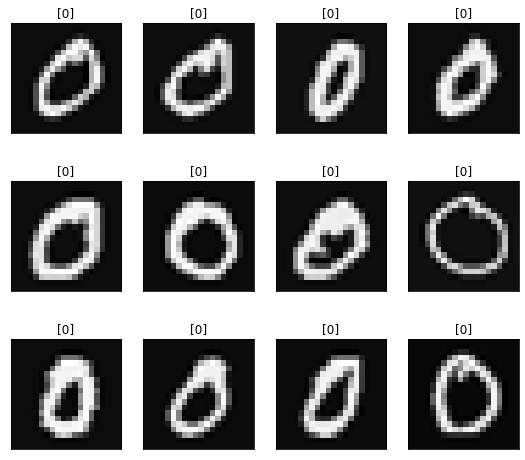

In [22]:
plot_mnist(X,y,h,w)

#### Splitting the existing data in a proportion of 30% per test samples and 7 for training set.

In [23]:
features_train, features_test, labels_train, labels_test = train_test_split(X, y, test_size=0.3)

In [24]:
knn = KNeighborsClassifier(n_neighbors=10); # from sklearn.neighbors import KNeighborsClassifier
knn.fit(features_train,labels_train);

D:\ProgramData\Anaconda3\envs\Python 36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [25]:
predictions=np.zeros((labels_train.shape[0]),dtype=int)
predictions=knn.predict(features_test)
output = accuracy_score(labels_test, predictions)
print("Accuracy match: ")
print(output)

0.944


In [26]:
print("classification report:\n",classification_report(labels_test, predictions),"\n\nconfusion matrix:\n",confusion_matrix(labels_test, predictions),'\n\nf1 score:\n',f1_score(labels_test, predictions, average='micro'))


classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       140
           1       0.88      1.00      0.94       130
           2       0.98      0.91      0.94       145
           3       0.91      0.95      0.93       135
           4       0.99      0.91      0.95       151
           5       0.97      0.91      0.94       170
           6       0.95      0.98      0.96       163
           7       0.94      0.92      0.93       142
           8       0.97      0.93      0.95       170
           9       0.91      0.94      0.92       154

    accuracy                           0.94      1500
   macro avg       0.94      0.95      0.94      1500
weighted avg       0.95      0.94      0.94      1500
 

confusion matrix:
 [[140   0   0   0   0   0   0   0   0   0]
 [  0 130   0   0   0   0   0   0   0   0]
 [  3   3 132   1   0   0   1   3   1   1]
 [  0   1   1 128   0   1   1   1   1   1]
 [  0   4   0   0 137   